In [ ]:
import torch
import numpy as np

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)


num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


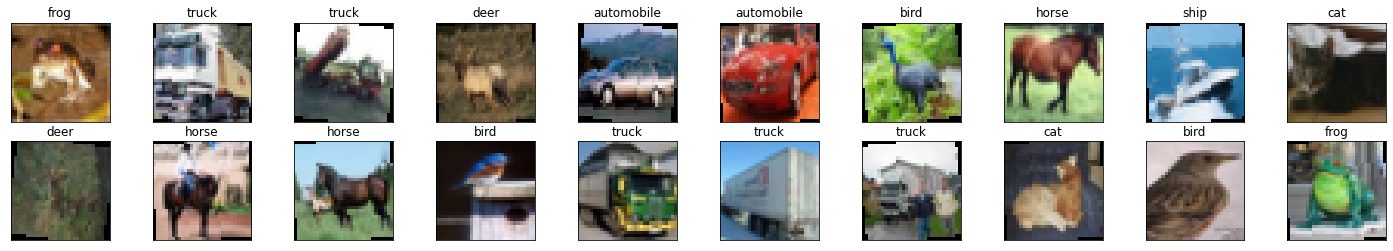

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
import torch.nn as nn

model = nn.Sequential(nn.Conv2d(3 , 16 , 3 , padding = 1),
                      nn.ReLU(),
                      nn.MaxPool2d(2 , 2),
                      nn.BatchNorm2d(16),
                      #image now 16x16x6
                      nn.Conv2d(16 , 32 , 3 , padding = 1),
                      nn.ReLU(),
                      nn.MaxPool2d(2 , 2),
                      nn.BatchNorm2d(32),
                      #image now 8x8x32
                      nn.Conv2d(32 , 64 , 3 , padding = 1),
                      nn.ReLU(),
                      nn.MaxPool2d(2 , 2),
                      nn.BatchNorm2d(64),
                      #image now 4x4x64


                      nn.Flatten(),
                      nn.Linear(64*4*4 , 500),
                      nn.ReLU(),
                      nn.Linear(500 , 10)
                      )

In [ ]:
import torch.optim as optim
cost = nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

Epoch: 1 	Training Loss: 1.342537 	Validation Loss: 1.052312
Validation loss decreased (inf --> 1.052312).  Saving model ...
Epoch: 2 	Training Loss: 1.006760 	Validation Loss: 0.893473
Validation loss decreased (1.052312 --> 0.893473).  Saving model ...
Epoch: 3 	Training Loss: 0.873488 	Validation Loss: 0.776902
Validation loss decreased (0.893473 --> 0.776902).  Saving model ...
Epoch: 4 	Training Loss: 0.779557 	Validation Loss: 0.737203
Validation loss decreased (0.776902 --> 0.737203).  Saving model ...
Epoch: 5 	Training Loss: 0.720184 	Validation Loss: 0.667433
Validation loss decreased (0.737203 --> 0.667433).  Saving model ...
Epoch: 6 	Training Loss: 0.670732 	Validation Loss: 0.619362
Validation loss decreased (0.667433 --> 0.619362).  Saving model ...
Epoch: 7 	Training Loss: 0.625126 	Validation Loss: 0.571207
Validation loss decreased (0.619362 --> 0.571207).  Saving model ...
Epoch: 8 	Training Loss: 0.588956 	Validation Loss: 0.534998
Validation loss decreased (0.57120

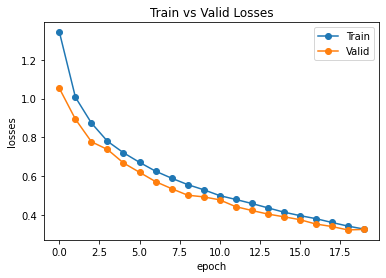

In [ ]:
n_epochs = 20

train_losses = []
valid_losses = []

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = cost(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()

    ######################
    # validate the model #
    ######################
    model.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = cost(output, target)
        # update validation loss
        valid_loss += loss.item()


    # calculate average losses
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    # Plotting train loss and validation loss

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_augmented.pt')
        valid_loss_min = valid_loss

print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(valid_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

In [ ]:

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = cost(output, target)
    # update test loss
    test_loss += loss.item()
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.035086

Test Accuracy of airplane: 78% (781/1000)
Test Accuracy of automobile: 86% (865/1000)
Test Accuracy of  bird: 67% (673/1000)
Test Accuracy of   cat: 61% (617/1000)
Test Accuracy of  deer: 79% (799/1000)
Test Accuracy of   dog: 65% (659/1000)
Test Accuracy of  frog: 87% (872/1000)
Test Accuracy of horse: 85% (856/1000)
Test Accuracy of  ship: 82% (822/1000)
Test Accuracy of truck: 86% (861/1000)

Test Accuracy (Overall): 78% (7805/10000)
